In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('03_02_clusters.csv', delimiter=";")

In [3]:
print(df.head(10))

   Latitud  Longitud
0   8.9784  -83.0378
1   8.9786  -83.0833
2   9.0236  -83.0377
3   8.9786  -83.0833
4   9.0246  -83.3104
5   8.9794  -83.3106
6   8.9343  -83.3562
7   9.0247  -83.3559
8   8.9792  -83.2651
9   8.9792  -83.2651


- K-Means
    - Técnica de ML no supervisado que se usa grupos de objetos de datos en un conjunto de datos
    - Itera dividiendo un grupo de n conjuntos de datos en k subgrupos en función de la similitud y la distancia media desde el centroide del subgrupo formado

- Desafío: Encontrar los grupos que tenemos presentes en nuestros datos:
    1. Carga el archivo clusters.csv en el dataframe
    2. Divide los datos en 4 grupos utilizando k-means
    3. Haz una predicción basada en este modelo
    4. Imprime las coordenadas del centroide de cada grupo
    5. Grafica los resultados y los centros de las agrupaciones determinados usando k-means

In [4]:
df.values

array([[  8.9784, -83.0378],
       [  8.9786, -83.0833],
       [  9.0236, -83.0377],
       ...,
       [  9.9302, -84.5385],
       [  9.9755, -84.5385],
       [  9.9302, -84.5385]], shape=(5106, 2))

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df.values)

In [6]:
X

array([[-1.72773644,  1.59145968],
       [-1.72737101,  1.53104537],
       [-1.64514816,  1.59159245],
       ...,
       [ 0.01136809, -0.40115018],
       [ 0.09413909, -0.40115018],
       [ 0.01136809, -0.40115018]], shape=(5106, 2))

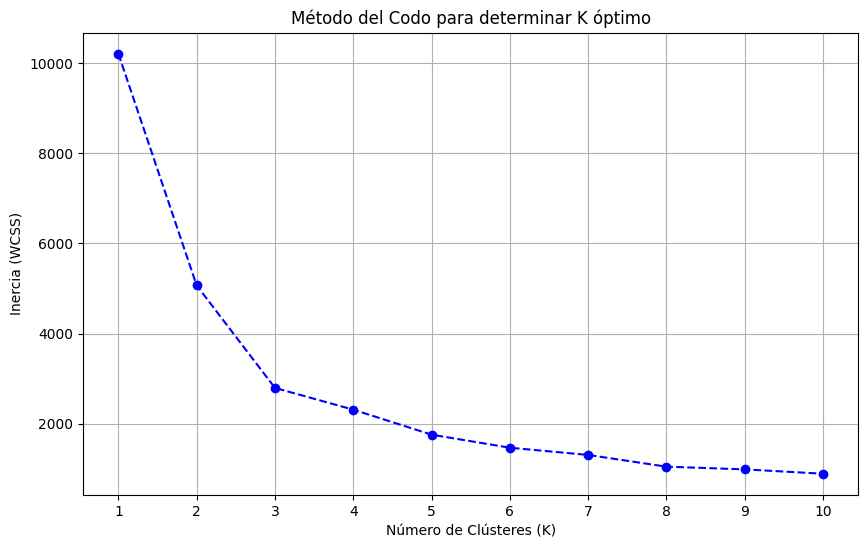

In [7]:
# Aplicamos el "método del codo" para identificar el valor de k

inercia = []
rango_k = range(1, 11)

for k in rango_k:
    kmeans = KMeans(n_clusters=k,
                n_init='auto',         # Número de veces que el algoritmo se ejecuta con diferentes semillas
                random_state=42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(rango_k, inercia, marker='o', linestyle='--', color='blue')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (WCSS)')
plt.xticks(rango_k)
plt.grid(True)
plt.show()

In [8]:
k=4
kmeans = KMeans(n_clusters=k,
                n_init='auto',       
                random_state=42)

kmeans.fit(X)

etiquetas_predichas = kmeans.predict(X)
centroides = kmeans.cluster_centers_

print(f"Etiquetas para los primeros 5 puntos: {etiquetas_predichas[:5]}")
print(f"Ubicación de los centroides:\n{centroides}")

Etiquetas para los primeros 5 puntos: [2 2 2 2 2]
Ubicación de los centroides:
[[ 0.25156754  0.84170134]
 [ 0.03780971 -0.09883613]
 [-1.7031834   1.24610408]
 [ 0.86943099 -1.23799649]]


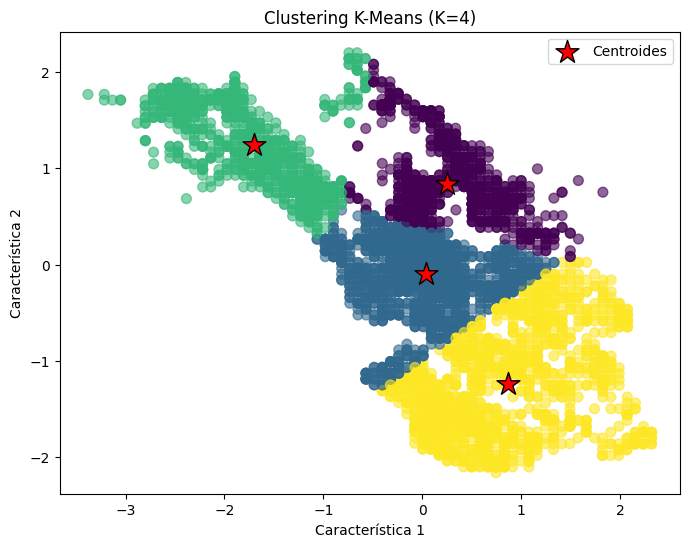

In [9]:
plt.figure(figsize=(8, 6))

# Graficar los puntos, coloreados por la etiqueta predicha
plt.scatter(X[:, 0], X[:, 1], c=etiquetas_predichas, s=50, cmap='viridis', alpha=0.6)

# Graficar los centroides encontrados
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=300,
            c='red', edgecolor='black', label='Centroides')

plt.title(f'Clustering K-Means (K={k})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()